
# Clean And Analyze Employee Exit Surveys

In this project we are going to clean and analyze surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Data sets provided for both of them in the project directory

There is two main question that we are going to answer:

1- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to answer these question for both of data sets combined.

## Opening and viewing data set 

We first start by importing essential libraries and opening the data set  

Then we are going to explore the data set by showing first 2 rows for each data sets and print information about them and also explore missing data counts in separate cells


In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")
%matplotlib inline


For dete_survey data set:


In [2]:
print(dete_survey.head(2))
print(dete_survey.isnull().sum())
dete_survey.info()

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   

  Role Start Date        Position Classification          Region  \
0            2004  Public Servant        A01-A04  Central Office   
1      Not Stated  Public Servant        AO5-AO7  Central Office   

                       Business Unit    Employment Status  ...  Kept informed  \
0  Corporate Strategy and Peformance  Permanent Full-time  ...              N   
1  Corporate Strategy and Peformance  Permanent Full-time  ...              N   

   Wellness programs  Health & Safety  Gender    Age  Aboriginal  \
0                  N                N    Male  56-60         NaN   
1                  N                N    Male  56-60         NaN   

   Torres Strait  South Sea  Disability  NESB  
0            NaN        NaN         NaN   Yes  
1            NaN        NaN         NaN

As we can see in blow the data set have 822 rows and 56 columns. Some columns have a lot of missing values like:

`Business Unit`                              
`Aboriginal`                       
`Torres Strait`                         
`South Sea`                             
`Disability`                             
`NESB`                                   

Also this data set contains 'Not Stated' values that indicate values are missing, but they aren't represented as Nan.

Let's do the same for tafe_survey data set


In [3]:
print(tafe_survey.head(2))
tafe_survey.info()

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0  

In [4]:
print(tafe_survey.isnull().sum())

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

As we can see in blow the data set have 702 rows and 72 columns. There are a lot columns with a very long string names. Also there is some columns with a lot of missing data.

## Data cleaning 
In this step we are going to apply some data cleaning techniques to our data sets

### "Not Stated" to Nan

We are going to read the dete_survey data set again but this time we set the 'Not Stated' to NaN 



In [5]:
dete_survey = pd.read_csv("dete_survey.csv", na_values = 'Not Stated')
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


### Dropping non-necessary columns 

Let's drop non necessary columns for each data set. We are going to drop 28 to 49 columns from dete_survey data set and 17 to 66 columns for tafe_survey data set


In [6]:
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)


### Modifying columns name 

in this part we are going to make some changes to data sets columns name to make them statndard and same. 

We first start by making modification to dete_survey data set. We are going to:

Make all capitalization lowercase
 
Remove any trailing whitespace from the end of the strings
 
Replace spaces with underscores ('_')


In [7]:
dete_survey.columns = dete_survey.columns.str.lower().str.replace("\s+", " ") .str.replace(" ", "_")

Then we are going to make changes to tafe_survey columns and make them same as dete_survey columns like blow: 

`Record ID`: `id`                     
`CESSATION YEAR`: `cease_date`                         
`Reason for ceasing employment`: `separationtype`                       
`Gender. What is your Gender?`: `gender`                        
`CurrentAge. Current Age`: `age`                       
`Employment Type. Employment Type`: `employment_status`                 
`Classification. Classification`: `position`                 
`LengthofServiceOverall. Overall Length of Service at Institute (in years)`: `institute_service`                    


In [8]:
changes = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'    
}

tafe_survey = tafe_survey.rename(changes, axis = 1)

Let's take a look at first rows for each data sets 

In [9]:
dete_survey.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [10]:
tafe_survey.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


### Include only resignation types.

If we remember goal of this project it is aimed to explore only for separation type of resignation. Then we are going to exclude other type of separation. To see the unique type of separations for each data set we showed them in the following two cells blow. As you can see for the dete_survey data set there are three type of resignation and we should include all three of them.


In [11]:
dete_survey["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We are going to find the row that their separation type contain 'Resignation' then save them to new copies          

In [13]:
dete_resignations = dete_survey[dete_survey["separationtype"].str.contains("Resignation", na = False)].copy()
tafe_resignations = tafe_survey[tafe_survey["separationtype"].str.contains("Resignation", na = False)].copy()

In [14]:
dete_resignations["separationtype"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

### Cleaning date columns

First let's take a look at unique values in `cease_date` `dete_resignations` columns in dete_resignations data set and `cease_date` column in tafe_registrations data set to explore any nonsense value


In [15]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

As it is clear all dates are logical in `cease_date` column of dete_resignations data set

In [16]:
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Also all dates are logical in `cease_date` column of tafe_resignations data set

In [17]:
dete_resignations["dete_start_date"].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

Also in this column there are no nonsense value

Now were are going to extract the years from `cease_date` column of dete_resignations data set and convert to float type


In [18]:
pattern = r"([1-2][0-9]{3})"
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(pattern)
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype("float")
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

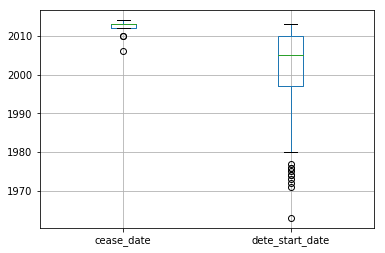

In [19]:
boxplot1 = dete_resignations.boxplot(column = ['cease_date', 'dete_start_date'])

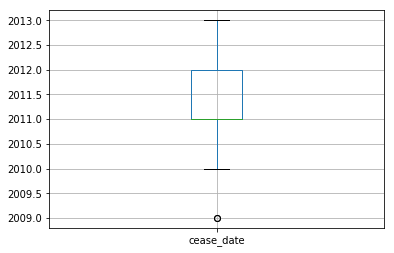

In [20]:
boxplot2 = tafe_resignations.boxplot(column = ['cease_date'])

As you can see for better view of dates in these data sets we plotted the box plot for date columns as in above.

for the `dete_resignations` data set most of the start dates are in between 200 and 2010 but there are some outliers which are below 1980. but for cease date most of them happened after 2010. Also for `tafe_resignations` data set cease dates happened mostly between 2011 and 2012

### New column of institute_service 

According to the project goal we need service time to be calculated. For `tafe_resignations` these time actually calculated and saved in the column `institute_service`. We need to add new column with this name in `dete_resignations` data set. We only need to subtract the `dete_start_date` from the `cease_date`.



In [21]:
dete_resignations["institute_service"] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [22]:
dete_resignations["institute_service"].value_counts().sort_index(ascending = False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

In [23]:
dete_resignations["institute_service"].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

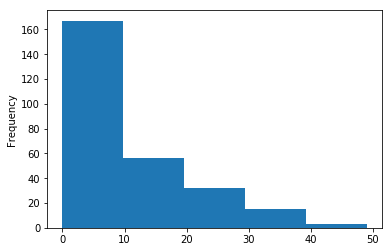

In [24]:
dete_resignations["institute_service"].plot.hist(bins = 5)

as you can see base on above results most of employees had between 0 and 10 years of service.


### Identify Dissatisfied Employees

In this step we are going to identify dissatisfied employees. In each data set there are some columns that we can imply if the employee resigned because of dissatisfaction or not then we use them to create new column to indicate our imply. We first start with tafe data set.
In this data set there are two columns that we can use them for this task"
`Contributing Factors. Dissatisfaction`                
`Contributing Factors. Job Dissatisfaction`                 

in the code blow we just showed the value counts for one of them


In [25]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

We need to replace every '-' and NaN tyope False value and the rest of them to True value. For this we first define a faction for this task and then we will pass this function to applymap method to apply this function to all of the values in these two columns.
Here is the update_vals function in the code blow


In [26]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True
    


    

Then we pass the function to applymap method as in code blow

In [27]:
factors_tafe_dissatisfaction = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

tafe_resignations[factors_tafe_dissatisfaction] = tafe_resignations[factors_tafe_dissatisfaction].applymap(update_vals)


We can see the changes for `Contributing Factors. Dissatisfaction` column

In [28]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

And the changes for `Contributing Factors. Job Dissatisfaction` column for tafe data set

In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

now we are going to use df.any() method to creat a new column `dissatisfied`. as in code blow

In [30]:
tafe_resignations['dissatisfied'] = tafe_resignations[factors_tafe_dissatisfaction].any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy() 

In [31]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

As you can see there are 91 employee that resigned because of dissatisfaction in some way in tafe data set.

Now we are going to identify dissatisfaction for dete data set in this data set we are going to use blow data sets to imply dissatisfaction and we are going to do same approaches as we did for tafe data set

Columns used for dissatisfaction identification:

`job_dissatisfaction`                    
`dissatisfaction_with_the_department`             
`physical_work_environment`             
`lack_of_recognition`               
`lack_of_job_security`                 
`work_location`               
`employment_conditions`                  
`work_life_balance`                 
`workload`                  

But if we look at some we will know that in this data set the values are True or False so we don't need to change them 

For example:


In [32]:
dete_resignations['job_dissatisfaction'].value_counts(dropna=False)

False    270
True      41
Name: job_dissatisfaction, dtype: int64

we only need to creat new column of `dissatisfied` by using any() method

In [33]:
factors_dete_dissatisfaction =['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload'
]

dete_resignations['dissatisfied'] = dete_resignations[factors_dete_dissatisfaction].any(axis = 1, skipna = False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

AS we can see in above there are 149 employee in dete data set that resigned because of dissatisfaction.

## Combining the data

Now it is the time to combine data sets.

we are going to add a column to each data frame named `institute`  witch for dete_resignations_up is `DETE` and for tafe_resignations_up is `TAFE` to make both of them distingushible in combined datafarme


In [34]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

Now in the code blow we are going to combine two data sets

In [35]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
combined.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False


## Dropping missing values 

In this part we are going to deal with missing values. First we are going to see number of missing values in each column by the code blow


In [36]:
combined.notnull().sum()

Contributing Factors. Career Move - Private Sector     332
Contributing Factors. Career Move - Public Sector      332
Contributing Factors. Career Move - Self-employment    332
Contributing Factors. Dissatisfaction                  332
Contributing Factors. Ill Health                       332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Job Dissatisfaction              332
Contributing Factors. Maternity/Family                 332
Contributing Factors. NONE                             332
Contributing Factors. Other                            332
Contributing Factors. Study                            332
Contributing Factors. Travel                           332
Institute                                              340
WorkArea                                               340
aboriginal                                               7
age                                                    596
business_unit                                           

For this task we are going to drop columns with more than 500 missing values. Then we are going to filter columns with 151 or less non null values.

in the code blow we are going to drop these columns


In [37]:
combined_update = combined.dropna(thresh = 151, axis = 1).copy()

lets check the number of missing values in combined_update dataframe

In [38]:
combined_update.isnull().sum()

Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Self-employment    319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Ill Health                       319
Contributing Factors. Interpersonal Conflict           319
Contributing Factors. Job Dissatisfaction              319
Contributing Factors. Maternity/Family                 319
Contributing Factors. NONE                             319
Contributing Factors. Other                            319
Contributing Factors. Study                            319
Contributing Factors. Travel                           319
Institute                                              311
WorkArea                                               311
age                                                     55
career_move_to_private_sector                          340
career_move_to_public_sector                           3

As you can see there is no column with more than 500 missing values

## Cleaning the service column

In this part we are going to first extract numbers from this column then categorize them and assign them to new column named `service_cat`.

We are going to use the definition blow for categorizing

New: Less than 3 years at a company

Experienced: 3-6 years at a company

Established: 7-10 years at a company

Veteran: 11 or more years at a company

First lets convert each value in `institute_service` column to string then extract numbers then convert to float as in code blow


In [39]:
combined_update['institute_service_num'] = combined_update['institute_service'].astype('str').str.extract(r"(\d+)")

combined_update['institute_service_num'] = combined_update['institute_service_num'].astype('float')

combined_update['institute_service_num'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_num, dtype: int64

Now we are going to define a function to categorize numbers as we mentioned before then apply it to `institute_service_num` and assign it to new `service_cat` column

In [40]:
def categorize(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val < 6:
        return 'Experienced'
    elif 6 <= val < 10:
        return 'Established'
    elif val >= 10:
        return 'Veteran'
  
combined_update['service_cat'] = combined_update['institute_service_num'].apply(categorize)

combined_update['service_cat'].value_counts(dropna = False)

New            193
Experienced    155
Veteran        142
NaN             88
Established     73
Name: service_cat, dtype: int64

## Analyzing the data

In this part we are going to do our final analysis and show results
    But first we need to deal with some missing data in `dissatisfied` column as you can see there is 8 missing data


In [41]:
combined_update['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

To deal with this 8 missing values we are going to replace these values with the value that occurs most frequently in this column True or False

In [42]:
combined_update['dissatisfied'] = combined_update['dissatisfied'].fillna(False)
combined_update['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

Now it is the time to calculate the dissatisfied employees in each `service_cat` group

We are going to use pivot_table() method

True values are going to be considered 1 and false values considered 0 by calculating mean we could have the percentage.


In [43]:
pv_dissatisfied = combined_update.pivot_table(values = 'dissatisfied', index = 'service_cat')
pv_dissatisfied

,dissatisfied
service_cat,
Established,0.561644
Experienced,0.316129
New,0.295337
Veteran,0.471831


Let's plot the above table in  a bar plot using matplotlib

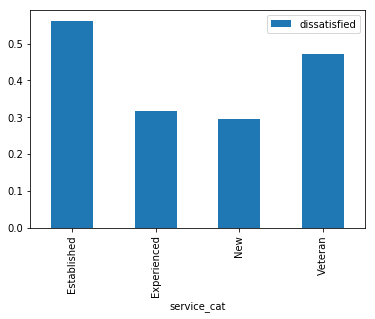

In [45]:
%matplotlib inline
pv_dissatisfied.plot(kind ='bar')

### First question

lets remind the first question:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

now we can answer this question

As you can see  employees who worked for long time resigning due to some kind of dissatisfaction more than employees who worked short period of time

### Second question

The second question was:

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

*"This project is ongoing project and we will add the rest of it as soon as possible"*


In [46]:
combined_update['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Lets categorize the ages for this data set. we are going to this as instruction in this [link](https://www.statcan.gc.ca/eng/concepts/definitions/age2) but just a little modification by our self

blow 24 = Young
24-55   = Adult
over 56 = old

but we first find the numbers in each cell of this column then, if there are upper and lower boundaries for the age we calculate the average and if not we only use the single number to categorize. after that we categorize this column and put in the new column named `age_cat`


In [113]:
def categorize_age(val):
    pattern = r"(\d+)"
    if pd.isnull(val):
        return np.nan
    else:
        x_string = re.findall(pattern, val)
        x = list(map(int, x_string))
    
    if len(x) > 1:
        age = (x[0] + x[1]) / 2
    else:
        age = x[0]
    if age <= 24:
        return "Young"
    elif 24 < age <= 55:
        return "Adult"
    elif age > 55:
        return "old"
  
combined_update['age_cat'] = combined_update['age'].apply(categorize_age)

combined_update['age_cat'].value_counts(dropna = False)

Adult    446
old       78
Young     72
NaN       55
Name: age_cat, dtype: int64

In [115]:
pv_dissatisfied_age = combined_update.pivot_table(values = 'dissatisfied', index = 'age_cat')
pv_dissatisfied_age

,dissatisfied
age_cat,
Adult,0.385650
Young,0.291667
old,0.423077


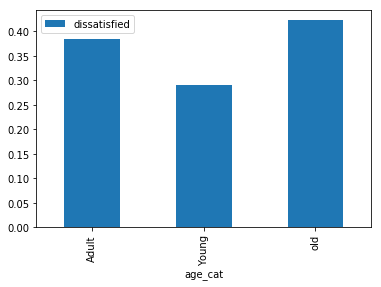

In [117]:
pv_dissatisfied_age.plot.bar()

## conclusion

- in this project we tried to answer some question about the employee exit for two data set
- we first did some data cleaning task for both data sets then we combined two of them
- we categorized the dissatisfied employees in terms of their experience and age
- we conclude employees who worked for long time resigning due to some kind of dissatisfaction more than employees who worked short period of time
- also we saw mostly old employees resigning due to some kind of dissatisfaction in compare to young employees